In [1]:
import numpy as np
from scipy import ndimage 
from scipy import misc

In [6]:
mapache = misc.face()
mapache

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

In [5]:
mapache.shape

(768, 1024, 3)

In [6]:
type(mapache)

numpy.ndarray

In [2]:
import matplotlib.pyplot as plt

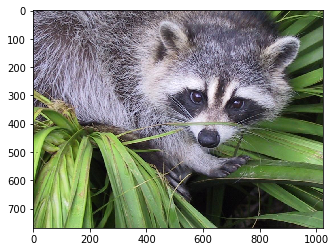

In [5]:
plt.imshow(mapache)
plt.show()

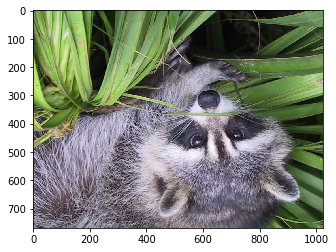

In [11]:
#dar la vuelta al array
mapache180  = mapache[::-1]
plt.imshow(mapache180)
plt.show()


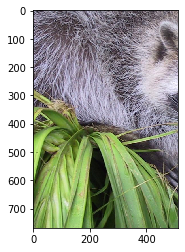

In [12]:
mp1,mp2 = np.hsplit(mapache,2)
plt.imshow(mp1)
plt.show()

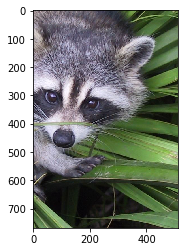

In [13]:
plt.imshow(mp2)
plt.show()

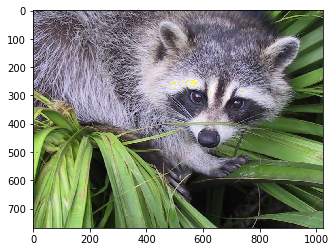

In [20]:
mapachesum = mapache + 1
plt.imshow(mapachesum)
plt.show()

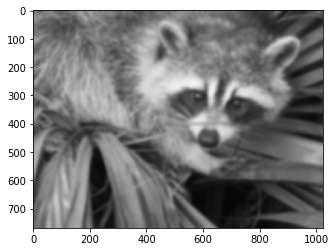

In [24]:
#Desenfoque de imagen
#Es necesario aplicar un filtro gaussiano
mapachedesenfocado = ndimage.gaussian_filter(mapache, sigma=5)
plt.imshow(mapachedesenfocado)
plt.show()

In [48]:
#
mapacheumbral = mapache > 128
alv = list( filter(lambda numero: numero > 128, mapache) )
alv

TypeError: 'numpy.bool_' object is not iterable

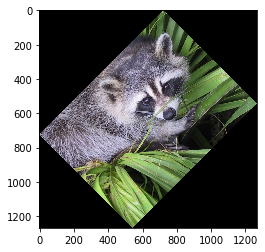

In [49]:
#Imagen rotada
mapache45 = ndimage.rotate(mapache, 45)
plt.imshow(mapache45)
plt.show()

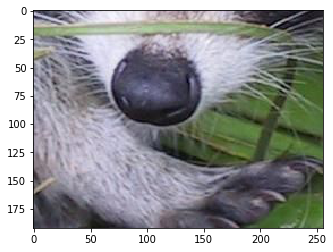

In [13]:
#Mapache rompecabezas 16
from numpy import array
n = 4
puzzle = [[0 for x in range(n)] for y in range(n)] 
puzzle_hash = [[0 for x in range(n)] for y in range(n)] 
jigsawh = np.hsplit(mapache,n)
for i in range(n):
    jigsawv = np.vsplit(jigsawh[i],n)
    for j in range(n):
        puzzle[i][j] = array(jigsawv[j]) 
        puzzle_hash[i][j] = str(hash((puzzle[i][j]).tostring()))

plt.imshow(puzzle[2][2])
plt.show()


#from numpy import array
#puzzle_hash = array(puzzle_hash)



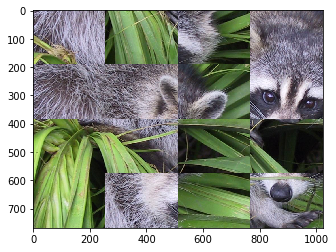

In [48]:
#mezclar la matriz
import random
shuffle = random.sample(puzzle, len(puzzle))

#Reconstruir y dibujar
puzzle_reconstructedv = []
puzzle_reconstructed = array([])
for i in range(n):
    puzzle_reconstructedv.append(np.concatenate(shuffle[i],axis=0))
puzzle_reconstructed = np.concatenate(puzzle_reconstructedv,axis=1)

#Crear el array shuffle
puzzle_shuffle = [[0 for x in range(n)] for y in range(n)]
shuffleh = np.hsplit(puzzle_reconstructed,n)
for i in range(n):
    shufflev = np.vsplit(shuffleh[i],n)
    for j in range(n):
        puzzle_shuffle[i][j] = array(shufflev[j]) 

        
plt.imshow(puzzle_reconstructed)
plt.show()




In [55]:
test = np.vsplit(mapache,6)